#  🐕 Dog breed recognition: classification

|   |   |
|---|---|
| Project  |    [Classez des images à l'aide d'algorithmes de Deep Learning](https://openclassrooms.com/fr/paths/148/projects/634/assignment)         |
| Date   |   March 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) |
| Mentor | Samir Tanfous | 
| Notebook number  | 2 of _                                                    |

**Description:** In this notebook we 

# Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 23 13:00:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    34W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/colab-notebooks/data

/content/drive/MyDrive/colab-notebooks/data


In [5]:
ls

images/  images_sample_15/  model.png  tb_logs/  testing/


In [6]:
!ls images_sample_15

n02085620-Chihuahua	      n02105412-kelpie
n02086910-papillon	      n02107142-Doberman
n02088364-beagle	      n02107312-miniature_pinscher
n02094433-Yorkshire_terrier   n02109047-Great_Dane
n02096294-Australian_terrier  n02112018-Pomeranian
n02097298-Scotch_terrier      n02113799-standard_poodle
n02099601-golden_retriever    n02113978-Mexican_hairless
n02105162-malinois


# Generate dataset

In [6]:
image_size = (180, 180)
batch_size = 8 # 4, 8 16

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "images_sample_15",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2537 files belonging to 15 classes.
Using 2030 files for training.
Using 507 files for validation.


In [8]:
breed_names = train_ds.class_names
breed_names = {idx:breed for idx,breed in enumerate(breed_names)}
print(breed_names)

{0: 'n02085620-Chihuahua', 1: 'n02086910-papillon', 2: 'n02088364-beagle', 3: 'n02094433-Yorkshire_terrier', 4: 'n02096294-Australian_terrier', 5: 'n02097298-Scotch_terrier', 6: 'n02099601-golden_retriever', 7: 'n02105162-malinois', 8: 'n02105412-kelpie', 9: 'n02107142-Doberman', 10: 'n02107312-miniature_pinscher', 11: 'n02109047-Great_Dane', 12: 'n02112018-Pomeranian', 13: 'n02113799-standard_poodle', 14: 'n02113978-Mexican_hairless'}


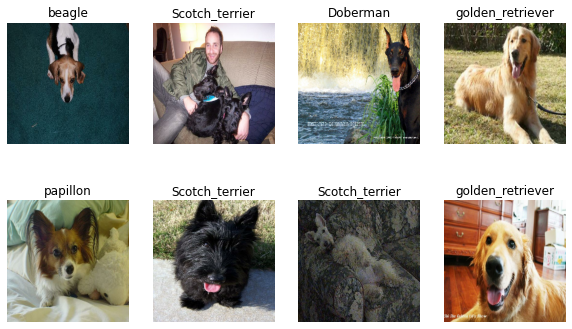

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        dir_name = breed_names[int(labels[i])]
        breed_name = dir_name.split('-')[1]
        plt.title(breed_name)
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


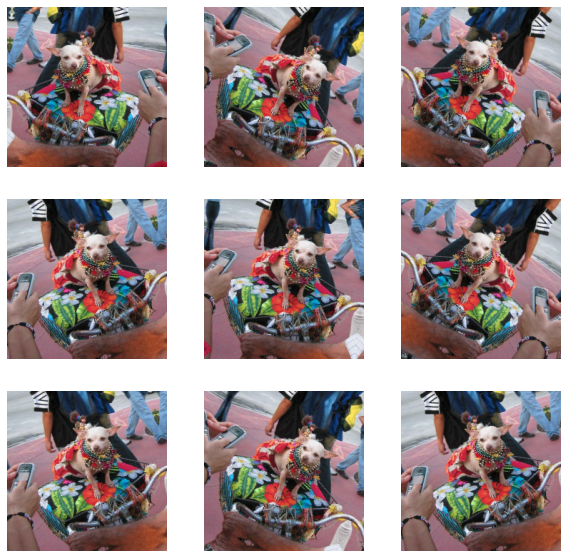

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# CNN from scratch

In [42]:
def make_cnn_model(filters, ker_sizes): #units

    # Model
    model = keras.Sequential(
        [   # input shape
            keras.Input(shape=image_size + (3,)),         

            # Preprocessing
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.Rescaling(1./255),

            # Block 1
            layers.Conv2D(filters=filters[1],
                          kernel_size=ker_sizes[1],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 2
            layers.Conv2D(filters=filters[2],
                          kernel_size=ker_sizes[2],
                          strides=(1,1),
                          padding="same"),  # for having outputsize=inputsize
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # # Block 3
            # layers.Conv2D(filters=filters[3],
            #               kernel_size=ker_sizes[3],
            #               strides=(1,1),
            #               padding="same"),  # for having outputsize=inputsize
            # layers.BatchNormalization(),
            # layers.Activation("relu"),
            # layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 4
            # layers.Conv2D(filters=filters[4],
            #               kernel_size=ker_sizes[4],
            #               strides=(1,1),
            #               padding="same"),  # for having outputsize=inputsize
            # layers.BatchNormalization(),
            # layers.Activation("relu"),
            # layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # # Block 5
            # layers.Conv2D(filters=filters[5],
            #               kernel_size=ker_sizes[5],
            #               strides=(1,1),
            #               padding="same"),  # for having outputsize=inputsize
            # layers.BatchNormalization(),
            # layers.Activation("relu"),
            # layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

            # Block 6
            layers.Flatten(),
            # layers.Dense(units[1], activation="relu"),
            layers.Dropout(0.1),
            # layers.Dense(units[2], activation="relu"),
            # layers.Dropout(0.5),

            layers.Dense(15, activation="softmax")
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [27]:
my_model = make_cnn_model(
    filters={1:32, 2:16}, # , 3:32, 4:32, 5:32,5:128 
    ker_sizes={1:3, 2:3, },   # 3:5, 4:10, 5:3, 5:3
    units={1:256, 2:256}
)

In [28]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 180, 180, 32)     

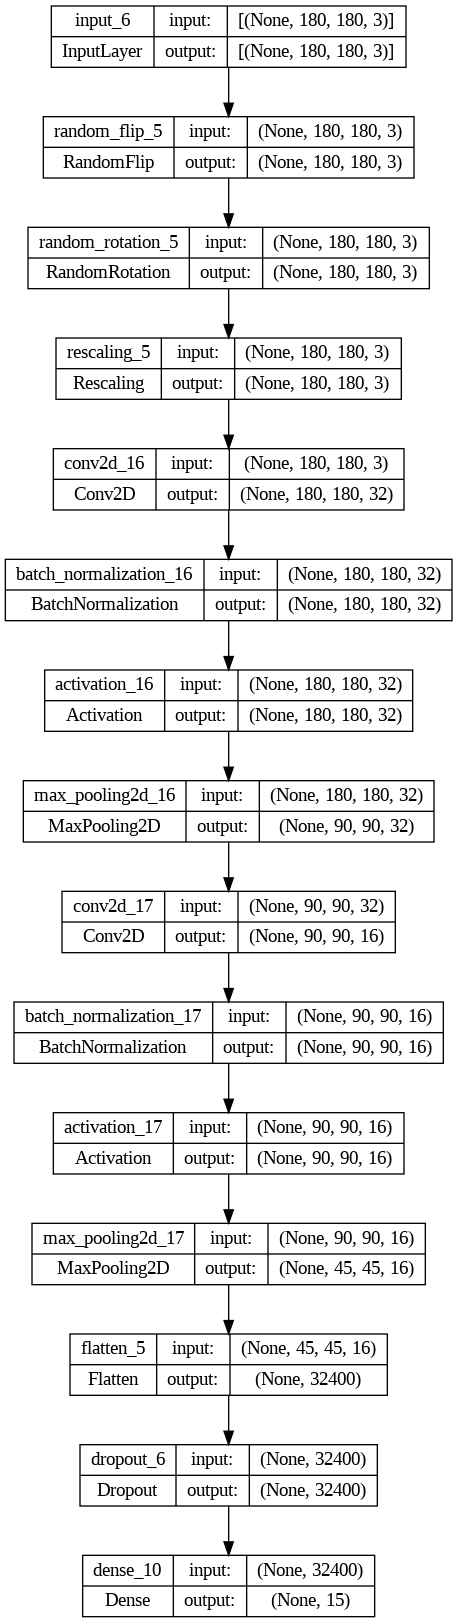

In [29]:
keras.utils.plot_model(my_model, show_shapes=True)

In [13]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 19.0 MB/s eta 0:00:00


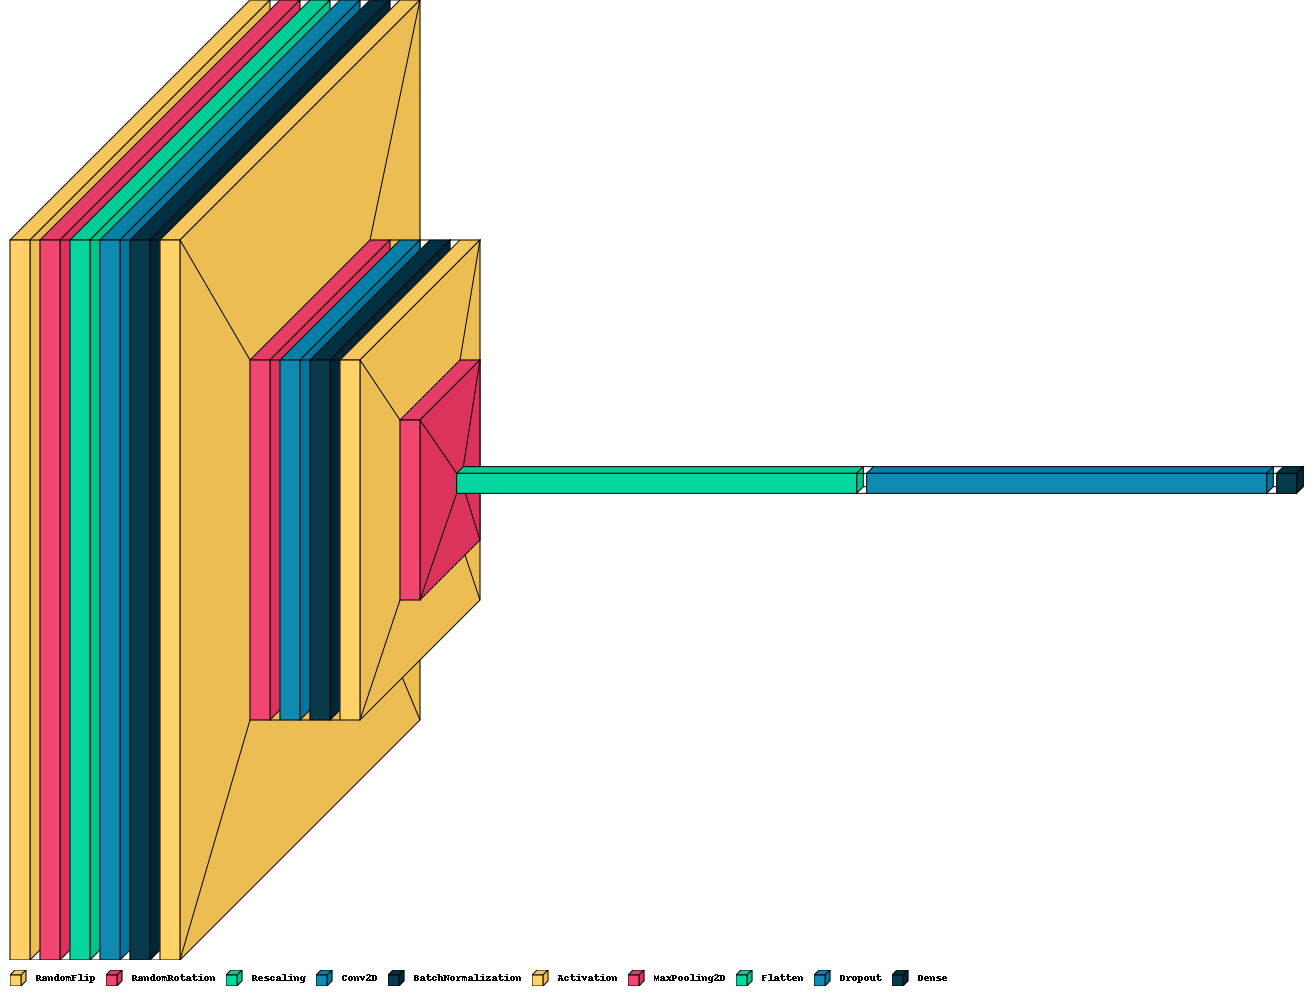

In [30]:
import visualkeras
visualkeras.layered_view(my_model, legend=True).show()

## Training the model

In [31]:
epochs = 10

my_model_h = my_model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)


Epoch 1/10


254/254 [==============================] - 756s 3s/step - loss: 8.3260 - accuracy: 0.1384 - val_loss: 6.0983 - val_accuracy: 0.1183
Epoch 2/10
254/254 [==============================] - 12s 46ms/step - loss: 3.9138 - accuracy: 0.1626 - val_loss: 3.6360 - val_accuracy: 0.1578
Epoch 3/10
254/254 [==============================] - 12s 47ms/step - loss: 2.6879 - accuracy: 0.2261 - val_loss: 2.5873 - val_accuracy: 0.1992
Epoch 4/10
254/254 [==============================] - 12s 48ms/step - loss: 2.3218 - accuracy: 0.2635 - val_loss: 2.4502 - val_accuracy: 0.2130
Epoch 5/10
254/254 [==============================] - 12s 47ms/step - loss: 2.1940 - accuracy: 0.2975 - val_loss: 2.4212 - val_accuracy: 0.2327
Epoch 6/10
254/254 [==============================] - 12s 47ms/step - loss: 2.1573 - accuracy: 0.3025 - val_loss: 2.4721 - val_accuracy: 0.2387
Epoch 7/10
254/254 [==============================] - 12s 46ms/step - loss: 2.1439 - accuracy: 0.3128 - val_loss: 2.4391 - val_accuracy: 0.2288
Epoc

In [32]:
import matplotlib.pyplot as plt

def plot_model_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(14, 6))

    # Axis for loss
    ax = fig.add_subplot(1,2,1)
    ax.plot(range(epochs), loss, label='Training loss',c='purple')
    ax.plot(range(epochs), val_loss, label='Validation loss',c='darkorange')
    ax.legend(loc='upper right')
    ax.set_xlabel('Epoch')
    plt.title('Loss')

    # Axis for accuracy
    ax = fig.add_subplot(1,2,2)
    ax.plot(range(epochs), acc, label='Train accuracy',c='purple')
    ax.plot(range(epochs), val_acc, label='Validation accuracy',c='darkorange')
    ax.legend(loc='lower right')
    plt.title('Accuracy')
    ax.set_xlabel('Epoch')

    plt.suptitle('CNN model performance')

    plt.show()

In [33]:
type(my_model_h)

keras.callbacks.History

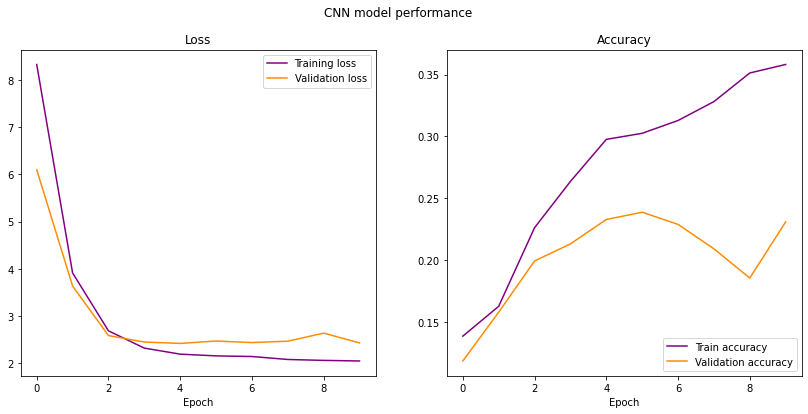

In [34]:
plot_model_history(my_model_h)

## Tuning the model

In [35]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.4 MB/s eta 0:00:00


In [36]:
import keras_tuner

In [43]:
def build_cnn_model(hp):
    filters = { 
        i : hp.Choice('filters_b' + str(i), 
                      values=[16,32,64],
                      ordered=False) for i in range(1,3)
    }

    ker_sizes = { 
        i : hp.Choice('ker_size_b' + str(i), 
                      values=[1,3,5,10],
                      ordered=False) for i in range(1,3)
    }

    # units = { 1: hp.Choice('units1', 
    #                        values=[256, 512, 1024],
    #                        ordered=False),
    #           2: hp.Choice('units2',
    #                        ordered=False,
    #                        values=[256, 512, 1024])
    # }

    model = make_cnn_model(
        filters=filters,
        ker_sizes=ker_sizes,
        # units=units
    )

    return model

build_cnn_model(keras_tuner.HyperParameters())

In [44]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_cnn_model,
    objective="val_accuracy",
    max_trials=6,
    executions_per_trial=1,
    directory='.',
    project_name='testing'
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
filters_b1 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': False}
filters_b2 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': False}
ker_size_b1 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 3, 5, 10], 'ordered': False}
ker_size_b2 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 3, 5, 10], 'ordered': False}


In [45]:
tuner.search(
    train_ds, 
    epochs=3, 
    validation_data=val_ds,
    callbacks=[keras.callbacks.TensorBoard('./tb_logs')])


Trial 5 Complete [00h 00m 54s]
val_accuracy: 0.19921104609966278

Best val_accuracy So Far: 0.216962531208992
Total elapsed time: 00h 04m 36s


In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]

In [ ]:
best_hps

In [46]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir tb_logs

# Transfer learning

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16()  # Creation of model VGG-16 implemented by Keras.